# Regresion Lineal y Descenso del Gradiente

El objetivo es:

*   Implementar grid search, gradient descent y stochastic gradient descent
*   Aprender a visualizer tus resultados
*   Identificar ventajas y desventajas de estos algortimos
*   Analizar el efecto de MSE      
  

  $x^n$
  $x_n$

$\textbf{A}$) ¿Qué representa cada columna de $\tilde{X}$ ̃?
- La primera columna representa un vector de unos 
- La segunda columna representa los datos de altura

$\textbf{B}$)¿Qué representa cada fila de  $\tilde{X}$ ?
- Cada fila de x representa el dato 1 para realizar la operación entre matrices y el valor de las alturas de todas las muestras o datos

$\textbf{C}$) ¿Por qué tenemos unos en $\tilde{X}$ ̃?
- El objetivo de la columna de unos es que al momento de realizar la operación entre matrices no se pierda el valor de $W_{0}$ y  pueda quedar de la forma  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$F= W_{0}+ W_{1}*X_{1}$ y de esta manera se pueda representar los datos de forma vectorial. 

$\textbf{E}$) Si tenemos las alturas y pesos de 3 personas, ¿cúal sería el tamaño de $\textbf{y}$ y $\tilde{X}$ ? ¿Qué
representaría   $\tilde{X}_{32}$ ?
- Y = 212.74
- X = 74.11
- Este dato representaría la altura de la tercera persona 

$\textbf{E}$) En lib.py, se ha proporcionado código para formar arrays para $\textbf{y}$ y $\tilde{X}$. Revisa el código y
asegúrate de entender cómo están construidos.
- En lin.py inicial mente contamos en la importacion de la librería numpy para operaciones matemáticas y listas
- posteriormente se crean 3 funciones:
    - load data: encargada de cargar los datos, ordenarlos y convertirlos en las unidades adecuadas y retornar un subconjunto de 50 muestra si la sub_sample es verdadera. 
    - standarizer(X): que aplica la función de estandarización calculado la media y la desviación estándar, devolviendo así los datos estandarizados. 
    - build_model_data(height, weight): prepara los datos para poder aplicar una regresión lineal agregando una columna de unos a x de alturas.





# Data

In [31]:
from lib import *

height, weight, gender = load_data(sub_sample=False)
X, mu_X, sigma_X = standarizer(height)
y, X_ = build_model_data(X, weight)

$\textbf{F}$) Verifica si los tamaños de las variables tienen sentido (usa la función shape).
- Al verificar el tamaño de las variables con la función shape se puede llegar a la conclusión de que los datos están correctos gracias a que tienen las mismas dimensiones. 

In [32]:
y.shape, X_.shape

((10000,), (10000, 2))

# 1. Calcule la funcion costo

Complete las funciones faltantes, verifique con el ejemplo de la clase

In [33]:
import numpy as np

def loss_function(X_, y, w, option=1):
 
  """
    Args:
      X_: matrix numpy de la forma (N,2)
      y: vector numpy de la forma (N,)
      w: vector de la forma (2,)
      option: 1 for mse
              0 for mae

    Return:
      El valor de la perdida correspondiente a el parametros de entrada w
  """
  errors =np.dot(X_, w)
  n = len(y)
  if option == 0:
    loss = (1/(n))*np.sum(np.abs(y-errors))
    return loss
  elif option == 1:
    loss = (1/(2*n))*np.sum((y-errors)**2)
    return loss
  



Ahora si todo esta bien, deberiamos obtener

In [34]:
xx = np.array([[1 ,1],
                [1, 2]])
yy = np.array([1, 2])
ww = np.array([0, 1])

loss_function(xx, yy, ww, 1)


0.0

# 2. Grid Search


In [35]:
def grid_search(X_, y, grid_w0, grid_w1, option):
  """
    Este algoritmo realiza la busqueda creando una cuadricula
    Args:
      X_ : numpy de la forma = (N,2)
      y  : numpy de forma =  (N,)
      grid_w0: numpy de la forma = (num_pts_w0,) .Array 1D que contiene num_pts_w0 valores del parametro w0 a ser probados en la cuadricula
      grid_w1: numpy de la forma = (num_pts_w1,) .Array 1D que contiene num_pts_w1 valores del parametro w1 a ser probados en la cuadricula
      option: scalar value = 1 para MSE y 0 para MAE
    Return:
      losses: numpy de la forma = (num_pts_w0, num_pts_w1). Array 2D que contiene los valores de la funcion de perdidad para cada una de las
              combinaciones de w0 y w1
  """
    
  losses_grid = np.zeros((len(grid_w0), len(grid_w1)))
  for i, w0 in enumerate(grid_w0):
    for j, w1 in enumerate(grid_w1):
      # Crear un array w con w0 y w1
      w = np.array([w0,w1])
      # Calcula la pérdida según la opción especificada (MSE o MAE)
      w = np.reshape(w,(len(w),1))
      y = np.reshape(y,(len(y),1))
      loss = loss_function(X_,y,w, option = option)
      # Almacena la pérdida en la posición correspondiente de la cuadrícula
      losses_grid[i, j] = loss
  return losses_grid



Si, todo va bien podremos usarla

In [ ]:
def gen_w(start, stop, n_intervals):
  """ Generamos la Grilla """
  #numpy.linspace(valor-inicial, valor-final, número de valores)
  grid_w0 = n+

def get_best_param(w0, w1, losses_grid):
  """ Obtenemos los mejores w* a partir del resultados obtenidos con la función de perdida en grid search
"""
  min_row, min_col = np.unravel_index(losses_grid.argmin(), losses_grid.shape)
  return losses_grid[min_row, min_col], w0[min_row], w1[min_col]

In [8]:
import datetime

# Emepzamos generando la malla
start = [-100, -150]
stop = [200, 150]
n_intervals = 10

grid_w0, grid_w1 = gen_w(start, stop, n_intervals)

# iniciamos la busqueda en la malla
start_time = datetime.datetime.now()
grid_losses = grid_search(X_,y, grid_w0, grid_w1, 1)

# Escogemos la mejor combinación
loss_min, w0_best, w1_best = get_best_param(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print(f"Grid Search: loss* = {loss_min}, w0* = {w0_best}, w1* = {w1_best}, execution time = {execution_time} seconds")

Grid Search: loss* = 42.42448314678248, w0* = 66.66666666666669, w1* = 16.666666666666686, execution time = 0.050657 seconds


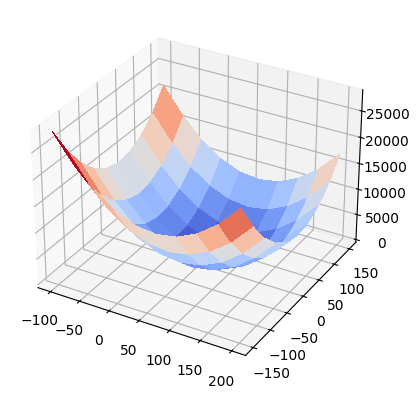

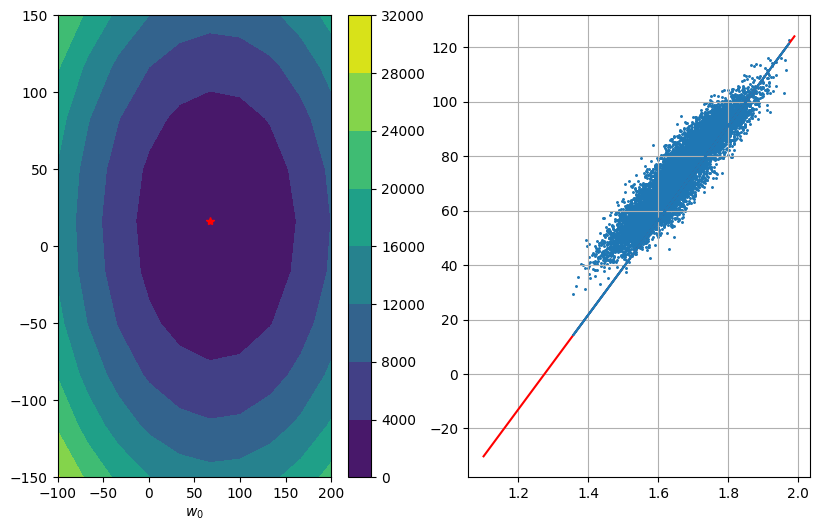

In [38]:
import matplotlib.pyplot as plt
from matplotlib import cm

def predictions(w0, w1, mu, sigma):
  """ Creemos el modelo de la regresion lineal f(x)"""
  x = np.arange(1.1, 2, 0.01)
  x_normalized = (x - mu)/sigma
  f = w0 + w1*x_normalized
  return x, f

# Grafiquemos los resultados 3D
w0, w1 = np.meshgrid(grid_w0, grid_w1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w0, w1, grid_losses, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig = plt.figure()

# plt contour
ax1 = fig.add_subplot(1,3,1)
contour = ax1.contourf(w0, w1, grid_losses.T)
fig.colorbar(contour, ax=ax1)
ax1.set_xlabel(r"$w_1$")
ax1.set_xlabel(r"$w_0$")
# ubiacion al minimo  - star
ax1.plot(w0_best, w1_best, marker = '*', color="r")

# plt model
ax2 = fig.add_subplot(1,3,2)
ax2.scatter( height, weight, marker='.', s=5)
ax2.grid()

x, f = predictions(w0_best, w1_best, mu_X, sigma_X)   # Modelos f(x) = w0 +w1*x
ax2 = fig.get_axes()[2]
ax2.plot(x, f, color='r')
ax2.plot(height, w0_best + w1_best*X)                 # Desde los datos
fig.set_size_inches(15, 6)



a) ¿Te parece una buena estimación? ¿Por qué? ¿Cuál es el problema? ¿Por qué el gráfico
MSE no es suave? Repite el ejercicio anterior cambiando el espaciado de la cuadr ́ıcula a 10
en lugar de 50. Compara el nuevo ajuste con el anterior.

In [46]:
n_intervals = 50
grid_w0, grid_w1 = gen_w(start, stop, n_intervals)

# iniciamos la busqueda en la malla
start_time = datetime.datetime.now()
grid_losses = grid_search(X_,y, grid_w0, grid_w1, 1)

# Escogemos la mejor combinación
loss_min, w0_best, w1_best = get_best_param(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print(f"Grid Search: loss* = {loss_min}, w0* = {w0_best}, w1* = {w1_best}, execution time = {execution_time} seconds")

Grid Search: loss* = 18.79354101952324, w0* = 71.42857142857142, w1* = 15.306122448979579, execution time = 0.879667 seconds


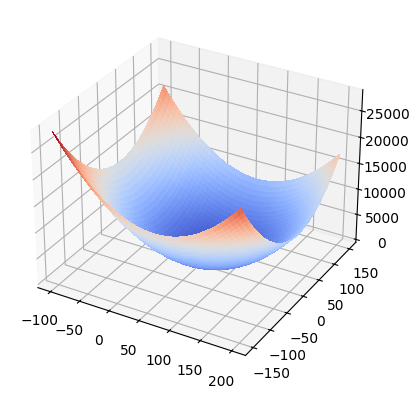

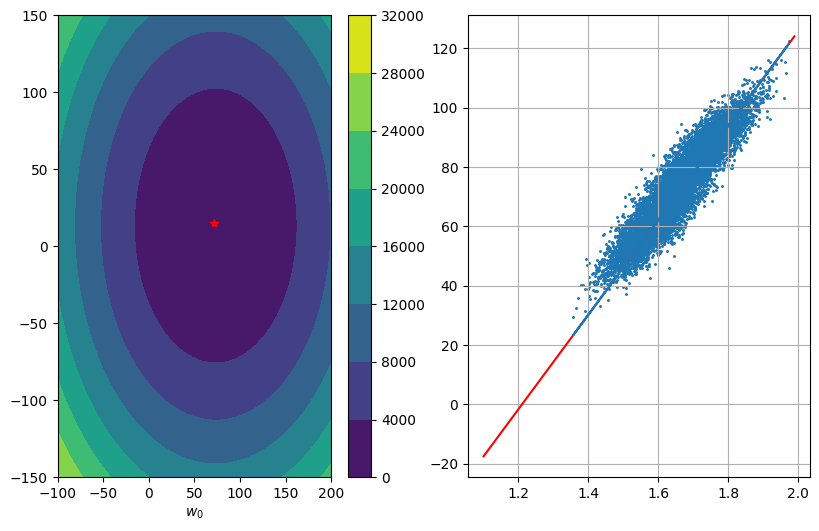

In [47]:
import matplotlib.pyplot as plt
from matplotlib import cm

def predictions(w0, w1, mu, sigma):
  """ Creemos el modelo de la regresion lineal f(x)"""
  x = np.arange(1.1, 2, 0.01)
  x_normalized = (x - mu)/sigma
  f = w0 + w1*x_normalized
  return x, f

# Grafiquemos los resultados 3D
w0, w1 = np.meshgrid(grid_w0, grid_w1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w0, w1, grid_losses, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig = plt.figure()

# plt contour
ax1 = fig.add_subplot(1,3,1)
contour = ax1.contourf(w0, w1, grid_losses.T)
fig.colorbar(contour, ax=ax1)
ax1.set_xlabel(r"$w_1$")
ax1.set_xlabel(r"$w_0$")
# ubiacion al minimo  - star
ax1.plot(w0_best, w1_best, marker = '*', color="r")

# plt model
ax2 = fig.add_subplot(1,3,2)
ax2.scatter( height, weight, marker='.', s=5)
ax2.grid()

x, f = predictions(w0_best, w1_best, mu_X, sigma_X)   # Modelos f(x) = w0 +w1*x
ax2 = fig.get_axes()[2]
ax2.plot(x, f, color='r')
ax2.plot(height, w0_best + w1_best*X)                 # Desde los datos
fig.set_size_inches(15, 6)



b) Discute con tus compañeros:
- Para obtener un ajuste preciso, ¿necesitas una cuadrícula gruesa o una cuadrícula fina?
- Prueba con distintos valores de espaciado de cuadrícula. ¿Qué observas?
- ¿Cómo afecta el aumento del n ́umero de valores al coste computacional? ¿Es rápido o
lento tu código?

# 3. Gradient Descent

A) Implementa una función que calcule los gradientes. Implementa la función de cuaderno
calcular gd(X_, w, y) utilizando la ecuación (1). Comprueba que la función devuelve los
valores correctos. Primero, calcula manualmente los gradientes para valores de y, $\tilde{X}$ y w
y compárelos con la salida de gd(X_, w, y).

In [41]:
def gd(X_, w, y):
    """ 
    Calculo del gradiente en w
    Args:
        X_: numpy de la forma (N, 2)
        w : numpy de la forma (2,). Vector de parámetros del modelo
        y : numpy de la forma (N,)
    Return:
        Un vector numpy de la forma (2,), que tiene el gradiente de la función de pérdida en w
    """
    n = len(y)
    errors = np.dot(X_, w)
    gradient = (1/n)*np.dot(X_.T, (errors - y))
    return gradient

Si esta bien, debe darnos lo siguiente

B) Una vez que te asegures de que tu código de gradiente es correcto, obtén alguna intuición
sobre los valores del gradiente: Calcula los gradientes para
- w0 = 100 y w1 = 20
- w0 = 50 y w1 = 10

¿Qué nos dicen los valores de estos gradientes? Por ejemplo, piensa en la norma de este
vector. ¿En qué caso son más grandes? ¿Qué significa eso?

Obs 1: Imagina una función cuadrática y estima su gradiente cerca de su mínimo y lejos de
 ́el.

Obs 2: Como sabemos de las clases, la regla de actualización para el descenso de gradiente
en el paso t es : $w^{(t+1)} = w^{t} - \gamma \bigtriangledown L(w^{t})$, donde $\gamma > 0$, y $\bigtriangledown L \epsilon R^{2}$

In [42]:
xx = np.array([[1 ,1], [1, 2]])
yy = np.array([1, 2])
ww = np.array([1, 1])

gd(xx, ww, yy)

array([1. , 1.5])

In [48]:
ww = np.array([100, 20])

gd(xx, ww, yy)

array([128.5, 197.5])

In [49]:
ww = np.array([50, 10])

gd(xx, ww, yy)

array([63.5, 97.5])

C) Llena la función del cuaderno de descenso de gradiente {gd_algorithm(X_, y, ...)}.
Ejecuta el código y visualiza las iteraciones. Además, observa los mensajes impresos que
muestran L y los valores de $w_{0}^{(t)}$ y $w_{1}^{(t)}$. Examina detenidamente estos gráficos:
- ¿Se está minimizando el costo?
- ¿Está convergiendo el algoritmo? ¿Qué se puede decir sobre la velocidad de convergencia?
- ¿Qué tan buenos son los valores finales de $w_{1}$ y $w_{0}$ encontrados?


Ahora, iteremos para encontrar el mejor w*

In [43]:
def gd_algorithm(X_, y, w_initial, max_iters, gamma):
  """
    Algoritmo GD
    Args:
      X_: numpy de la forma (N,2)
      y : numpy de la forma (N,)
      w_inicial: numpy de la forma (2,). Inicializacion del modelo
      max_iters: un escalar indicando el maximo numero de iteraciones
      gamma: escalar indicando el paso o learning rate

    Returns:
      losses: lsita de longuitud max_iters con loas valores de las perdidad para cada iteracion de GD
      wt: una lista de longuitud max_iters con los parametros del modelo como numpy de la forma (2,) apra cada iteracion
  """
  wt = [w_initial]
  losses = []
  w = w_initial

  for n_iter in range(max_iters):
    # Agrega el codigo apara calcular el gradiente y loss
    # ...
    

    # Agrega el coldigo para actualizar w
    # ...
    loss = loss_function(X_, y, w)
    gradient = gd(X_, w, y)
    w = w - gamma*gradient
    # Guardemos w y loss
    wt.append(w)
    losses.append(loss)
    print(" GD iter {i}/{ti}: loss={l}, w0={w0}, w1={w1}".format( i=n_iter,
          ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))

  return losses, wt

Deberiamos obtener

In [60]:
max_iters = 50
gamma = 0.7

w_initial = np.array([0, 0])

# # Iniciamos
# start_time = datetime.datetime.now()
# gd_l, gd_w = gd_algorithm(X_, y, w_initial, max_iters, gamma)
# end_time = datetime.datetime.now()

# # Vamos los resultados
# ex_time = (end_time - start_time).total_seconds()
# print(f"Tiempo de ejecucion del Algortimo GD: {ex_time:.3f} segundos")

def timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma):
  # Iniciamos
  start_time = datetime.datetime.now()
  gd_l, gd_w = gd_algorithm(X_, y, w_initial, max_iters, gamma)
  end_time = datetime.datetime.now()
  # Vamos los resultados 
  ex_time = (end_time - start_time).total_seconds()
  print(f"Tiempo de ejecucion del Algortimo GD: {ex_time:.3f} segundos")
  

timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)


 GD iter 0/49: loss=2792.2367127591674, w0=51.30574540147363, w1=9.435798704492282
 GD iter 1/49: loss=265.3024621089601, w0=66.69746902191572, w1=12.266538315840002
 GD iter 2/49: loss=37.87837955044118, w0=71.31498610804834, w1=13.11576019924433
 GD iter 3/49: loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
 GD iter 4/49: loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
 GD iter 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
 GD iter 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
 GD iter 7/49: loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
 GD iter 8/49: loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
 GD iter 9/49: loss=15.385888944638307, w0=73.29348920882515, w1=13.47963283863509
 GD iter 10/49: loss=15.385887965652202, w0=73.29379216412117, w1=13.479688556082861
 GD iter 11/49: loss=15.385887877543452, w0=73.29388305070998, w1=13.47970527131719

D) Ahora experimentemos con el valor del tamaño del paso y los parámetros de inicialización para ver cómo influyen en la convergencia. En teoría, el descenso de gradiente converge al optimo en funciones convexas, cuando el valor del tamaño del paso se elige apropiadamente.
- Prueba los siguientes valores del tamaño del paso: 0.001, 0.01, 0.5, 1, 2, 2.5. 

¿Qué observas? ¿Convergió el procedimiento?

In [61]:
gamma = 0.001
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=2792.2367127591674, w0=0.07329392200210519, w1=0.013479712434988977
 GD iter 1/49: loss=2786.685787960211, w0=0.14651455008220826, w1=0.026945945157542953
 GD iter 2/49: loss=2781.1459594599287, w0=0.21966195753423123, w1=0.04039871164737437
 GD iter 3/49: loss=2775.617205076818, w0=0.2927362175788022, w1=0.05383802537071596
 GD iter 4/49: loss=2770.099502673719, w0=0.36573740336332855, w1=0.06726389978033423
 GD iter 5/49: loss=2764.5928301577246, w0=0.4386655879620704, w1=0.08067634831554288
 GD iter 6/49: loss=2759.0971654800887, w0=0.5115208443762135, w1=0.09407538440221631
 GD iter 7/49: loss=2753.6124866361442, w0=0.5843032455339424, w1=0.10746102145280306
 GD iter 8/49: loss=2748.138771665208, w0=0.6570128642905136, w1=0.12083327286633921
 GD iter 9/49: loss=2742.675998650499, w0=0.7296497734283283, w1=0.13419215202846185
 GD iter 10/49: loss=2737.2241457190466, w0=0.8022140456570052, w1=0.14753767231142234
 GD iter 11/49: loss=2731.783191041604, w0=0.8747057

In [62]:
gamma = 0.5
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=2792.2367127591674, w0=36.646961001052595, w1=6.739856217494488
 GD iter 1/49: loss=709.598594091414, w0=54.97044150157889, w1=10.109784326241748
 GD iter 2/49: loss=188.9390644244757, w0=64.13218175184204, w1=11.794748380615388
 GD iter 3/49: loss=58.774182007740976, w0=68.71305187697361, w1=12.637230407802214
 GD iter 4/49: loss=26.23296140355733, w0=71.0034869395394, w1=13.058471421395629
 GD iter 5/49: loss=18.09765625251138, w0=72.1487044708223, w1=13.269091928192337
 GD iter 6/49: loss=16.0638299647499, w0=72.72131323646374, w1=13.374402181590693
 GD iter 7/49: loss=15.555373392809521, w0=73.00761761928446, w1=13.42705730828987
 GD iter 8/49: loss=15.428259249824436, w0=73.15076981069483, w1=13.453384871639459
 GD iter 9/49: loss=15.396480714078159, w0=73.22234590640001, w1=13.466548653314254
 GD iter 10/49: loss=15.38853608014159, w0=73.2581339542526, w1=13.473130544151651
 GD iter 11/49: loss=15.386549921657448, w0=73.27602797817889, w1=13.47642148957035
 GD

In [63]:
gamma = 1
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)


 GD iter 0/49: loss=2792.2367127591674, w0=73.29392200210519, w1=13.479712434988976
 GD iter 1/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 2/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 3/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 4/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 5/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 6/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 7/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 8/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 9/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 10/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 11/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712

In [64]:
gamma = 2
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)


 GD iter 0/49: loss=2792.2367127591674, w0=146.58784400421038, w1=26.95942486997795
 GD iter 1/49: loss=2792.236712759165, w0=-2.842170943040401e-14, w1=3.197442310920451e-13
 GD iter 2/49: loss=2792.2367127591656, w0=146.58784400421044, w1=26.959424869977607
 GD iter 3/49: loss=2792.2367127591647, w0=-5.684341886080802e-14, w1=6.394884621840902e-13
 GD iter 4/49: loss=2792.2367127591624, w0=146.5878440042104, w1=26.959424869977287
 GD iter 5/49: loss=2792.2367127591583, w0=0.0, w1=9.663381206337363e-13
 GD iter 6/49: loss=2792.236712759154, w0=146.58784400421038, w1=26.959424869976964
 GD iter 7/49: loss=2792.2367127591524, w0=2.842170943040401e-14, w1=1.3038459201197838e-12
 GD iter 8/49: loss=2792.2367127591474, w0=146.58784400421035, w1=26.95942486997663
 GD iter 9/49: loss=2792.2367127591456, w0=5.684341886080802e-14, w1=1.6129320101754274e-12
 GD iter 10/49: loss=2792.236712759141, w0=146.58784400421033, w1=26.95942486997634
 GD iter 11/49: loss=2792.2367127591397, w0=8.526512829

In [ ]:
gamma = 2.5
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=2792.2367127591674, w0=183.23480500526298, w1=33.69928108747244
 GD iter 1/49: loss=6263.300243872087, w0=-91.61740250263145, w1=-16.84964054373576
 GD iter 2/49: loss=14073.193188876141, w0=320.6609087592101, w1=58.97374190307583
 GD iter 3/49: loss=31645.452315135255, w0=-297.75655813355206, w1=-54.761331767140405
 GD iter 4/49: loss=71183.03534921817, w0=629.8696422055909, w1=115.84127873818207
 GD iter 5/49: loss=160142.59717590467, w0=-761.5696583031229, w1=-140.06263701979887
 GD iter 6/49: loss=360301.6112859488, w0=1325.5892924599464, w1=243.79323661716862
 GD iter 7/49: loss=810659.3930335471, w0=-1805.149133684656, w1=-331.9905738382762
 GD iter 8/49: loss=1823964.4019656423, w0=2890.958505532245, w1=531.6851418448812
 GD iter 9/49: loss=4103900.6720628506, w0=-4153.202953293102, w1=-763.8284316798408
 GD iter 10/49: loss=9233757.279781561, w0=6413.039234944913, w1=1179.4419286072216
 GD iter 11/49: loss=20775934.647148643, w0=-9436.324047412105, w1=-1735.

- Prueba diferentes inicializaciones con un tamaño de paso fijo $\gamma$ = 0.1, por ejemplo:
    - w0 = 0, w1 = 0
    - w0 = 100, w1 = 10
    - w0 = −1000, w1 = 1000
    
    ¿Qué observas? ¿Convergió el procedimiento?

In [66]:
gamma = 0.1
w_initial = np.array([0, 0])
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=2792.2367127591674, w0=7.32939220021052, w1=1.3479712434988977
 GD iter 1/49: loss=2264.635056030003, w0=13.925845180399987, w1=2.5611453626479053
 GD iter 2/49: loss=1837.27771407938, w0=19.862652862570506, w1=3.653002069882013
 GD iter 3/49: loss=1491.1182670993758, w0=25.205779776523975, w1=4.63567310639271
 GD iter 4/49: loss=1210.7291150455717, w0=30.014593999082095, w1=5.520077039252339
 GD iter 5/49: loss=983.6139018819908, w0=34.3425267993844, w1=6.316040578826006
 GD iter 6/49: loss=799.6505792194903, w0=38.237666319656476, w1=7.032407764442306
 GD iter 7/49: loss=650.640287862865, w0=41.74329188790135, w1=7.677138231496976
 GD iter 8/49: loss=529.9419518639982, w0=44.89835489932173, w1=8.25739565184618
 GD iter 9/49: loss=432.1762997049161, w0=47.737911609600076, w1=8.779627330160462
 GD iter 10/49: loss=352.9861214560597, w0=50.29351264885059, w1=9.249635840643318
 GD iter 11/49: loss=288.842077074486, w0=52.59355358417605, w1=9.672643500077887
 GD iter 1

In [67]:
gamma = 0.1
w_initial = np.array([100, 10])
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=378.0473881987589, w0=97.32939220021052, w1=10.347971243498908
 GD iter 1/49: loss=309.1417031360723, w0=94.92584518039999, w1=10.661145362647925
 GD iter 2/49: loss=253.32809823529618, w0=92.7626528625705, w1=10.94300206988204
 GD iter 3/49: loss=208.1190782656674, w0=90.81577977652397, w1=11.196673106392742
 GD iter 4/49: loss=171.4997720902681, w0=89.06359399908209, w1=11.424977039252376
 GD iter 5/49: loss=141.8381340881947, w0=87.4866267993844, w1=11.630450578826045
 GD iter 6/49: loss=117.81220730651526, w0=86.06735631965647, w1=11.815376764442346
 GD iter 7/49: loss=98.35120661335486, w0=84.79001288790134, w1=11.981810331497018
 GD iter 8/49: loss=82.58779605189501, w0=83.64040379932173, w1=12.131600541846222
 GD iter 9/49: loss=69.81943349711263, w0=82.60575561960007, w1=12.266411731160506
 GD iter 10/49: loss=59.47705982773877, w0=81.67457225785058, w1=12.387741801543362
 GD iter 11/49: loss=51.09973715554598, w0=80.83650723227605, w1=12.496938864887932
 GD

In [68]:
gamma = 0.1
w_initial = np.array([-1000, 1000])
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=1062606.4462798769, w0=-892.6706077997894, w1=901.3479712434987
 GD iter 1/49: loss=860714.1448053948, w0=-796.0741548195998, w1=812.5611453626476
 GD iter 2/49: loss=697181.3806110647, w0=-709.1373471374293, w1=732.6530020698816
 GD iter 3/49: loss=564719.8416136574, w0=-630.8942202234757, w1=660.7356731063923
 GD iter 4/49: loss=457425.9950257574, w0=-560.4754060009175, w1=596.0100770392519
 GD iter 5/49: loss=370517.9792895585, w0=-497.0984732006151, w1=537.7570405788256
 GD iter 6/49: loss=300122.4865432374, w0=-440.059233680343, w1=485.32930776444186
 GD iter 7/49: loss=243102.1374187173, w0=-388.72391811209815, w1=438.1443482314965
 GD iter 8/49: loss=196915.654627856, w0=-342.52213410067776, w1=395.6778846518457
 GD iter 9/49: loss=159504.60356725843, w0=-300.9405284903994, w1=357.45806743016
 GD iter 10/49: loss=129201.65220817433, w0=-263.5170834411489, w1=323.06023193064283
 GD iter 11/49: loss=104656.26160731626, w0=-229.83598289682345, w1=292.10217998107

# 4. Stochastic Gradient Descent
Implementemos el descenso de gradiente estocástico. Recordemos de la clase que la regla de actualización para el descenso de gradiente estocástico en una función objetivo $L(w)= \frac{1}{N} \sum_{n=1}^{N}L_{n}(w) $ en el paso t es:  $$w^{(t+1)} = w^{t} - \gamma \bigtriangledown L_{n}(w^{t})$$

¿Que diferencias encuentras entre el procedimiento del gradiente descendente y el estocastico?

In [124]:
def sgd_algorithm(X_, y, w_initial, max_iters, gamma):
    wt = [w_initial]
    losses = []
    w = w_initial

    for n_iter in range(max_iters):
        # Selección aleatoria de una muestra
        i = np.random.randint(0, X_.shape[0])  # Índice aleatorio
        X_i = X_[i:i+1]  # Muestra X
        y_i = y[i:i+1]   # Etiqueta correspondiente
        
        # Cálculo de la pérdida y del gradiente para la muestra seleccionada
        loss = loss_function(X_i, y_i, w)
        gradient = gd(X_i, w, y_i)  # Cálculo del gradiente para la muestra
        
        # Actualización del parámetro w
        w = w - gamma * gradient

        # Guardar w y loss
        wt.append(w)
        losses.append(loss)
        
        # Imprimir la información de la iteración actual
        print("SGD iter {i}/{ti}: loss={l}, w0={w0}, w1={w1}".format(i=n_iter, ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))
    return wt, losses

In [125]:
max_iters = 50
gamma = 0.7
w_initial = np.array([0, 0])
sgd_algorithm(X_, y, w_initial, max_iters, gamma)

SGD iter 0/49: loss=3582.7266370340453, w0=59.254300302116164, w1=55.40264687103409
SGD iter 1/49: loss=1333.0575959269568, w0=95.39840693111472, w1=22.20652248222934
SGD iter 2/49: loss=600.0800689482, w0=71.14807770511788, w1=-9.63311602477718
SGD iter 3/49: loss=26.06826266541057, w0=66.09368383323746, w1=-6.428853786878787
SGD iter 4/49: loss=772.4046289238236, w0=93.60652694959582, w1=33.01641963506177
SGD iter 5/49: loss=1.3289693985974058, w0=92.46530391678169, w1=34.509498902988526
SGD iter 6/49: loss=56.62471667033631, w0=99.91461410880146, w1=25.21244933939206
SGD iter 7/49: loss=77.24106976023009, w0=91.21425501477404, w1=26.25959693607271
SGD iter 8/49: loss=101.34103500846518, w0=81.24860328955828, w1=25.466167086202613
SGD iter 9/49: loss=47.6934151816687, w0=74.41197057468794, w1=19.471210620353716
SGD iter 10/49: loss=26.586633802957095, w0=69.30757040161197, w1=16.57025178617806
SGD iter 11/49: loss=5.482836896990666, w0=66.98955828795707, w1=13.201789086918179
SGD ite

([array([0, 0]),
  array([59.2543003 , 55.40264687]),
  array([95.39840693, 22.20652248]),
  array([71.14807771, -9.63311602]),
  array([66.09368383, -6.42885379]),
  array([93.60652695, 33.01641964]),
  array([92.46530392, 34.5094989 ]),
  array([99.91461411, 25.21244934]),
  array([91.21425501, 26.25959694]),
  array([81.24860329, 25.46616709]),
  array([74.41197057, 19.47121062]),
  array([69.3075704 , 16.57025179]),
  array([66.98955829, 13.20178909]),
  array([77.57422575, 14.05250904]),
  array([76.81153737, 13.77935025]),
  array([75.75649899, 15.03378579]),
  array([71.49586779, 11.75327329]),
  array([69.79931946, 10.15927247]),
  array([74.17449755, 17.41385719]),
  array([67.82798776,  9.37121679]),
  array([68.92828675,  8.88678714]),
  array([71.21215314,  8.73678774]),
  array([75.22225907, 12.32100191]),
  array([63.82393462, 16.09135721]),
  array([71.33101258, 20.92566741]),
  array([81.74762739,  5.49099042]),
  array([86.47923662, 11.43158489]),
  array([83.46737159,

# 5. Outliers

Simulemos la presencia de dos valores at ́ıpicos y su efecto en la regresi ́on lineal bajo la
funci ́on de costo de error cuadr ́atico medio (MSE). Para esto vuevle cargar los datos a trav ́es de
la funci ́on load_data() estableciendo {sub_sample=True} para mantener solo algunos ejemplos
de datos. Agrega dos outliers y encuentra el modelo.

- (a) ¿Se logra un buen ajuste?
- (b) ¿La funci ́on de perdida MSE es robusta ante outliers?

In [130]:
height, weight, gender = load_data(sub_sample=True)
X, mu_X, sigma_X = standarizer(height)
y2, X_2 = build_model_data(X, weight)


X_2 = np.append(X_, [[1, 1.6], [1, 1.3]], axis=0)  # Nuevas muestras en X con valores extremos
y2 = np.append(y, [2, 1])            # Nuevas muestras en y con valores extremos
# Inicialización de parámetros y entrenamiento del modelo


w_initial = np.array([0, 0])  # Inicialización del modelo
max_iters = 1000              # Número de iteraciones
gamma = 0.01                  # Tasa de aprendizaje


wt, losses  = sgd_algorithm(X_2, y2, w_initial, max_iters, gamma)


SGD iter 0/999: loss=3910.608219951233, w0=0.8843764153290422, w1=1.010336677661803
SGD iter 1/999: loss=4070.076649530509, w0=1.7866043964436282, w1=1.920412351726592
SGD iter 2/999: loss=1662.506434907232, w0=2.363233642130531, w1=1.0557724596634488
SGD iter 3/999: loss=2708.9393872354017, w0=3.099296056228059, w1=1.246913954447776
SGD iter 4/999: loss=3227.9949398524986, w0=3.9027878035226404, w1=1.9714797369953077
SGD iter 5/999: loss=2646.5439810604566, w0=4.630323916861416, w1=2.0318994645604276
SGD iter 6/999: loss=1908.877189630719, w0=5.248203709317961, w1=2.3815065478913944
SGD iter 7/999: loss=3399.1689429659136, w0=6.072724047813733, w1=3.0273893639782554
SGD iter 8/999: loss=1948.44462975896, w0=6.696974739404694, w1=3.035019296936539
SGD iter 9/999: loss=3136.2207810455916, w0=7.488962211659854, w1=3.643058126878159
SGD iter 10/999: loss=1929.3170645426019, w0=8.110141262263237, w1=3.3608175915447482
SGD iter 11/999: loss=3105.1498068389355, w0=8.89819580439074, w1=3.1454

ValueError: x and y must be the same size

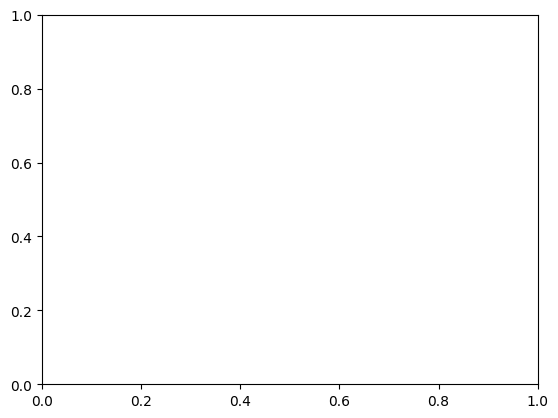